# Problem Statement 1 Predict Vote Based On Election Data

You are hired by one of the leading news channel CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.


**Data Dictionary**

1. vote: Party choice: Conservative or Labour

2. age: in years

3. economic.cond.national: Assessment of current national economic conditions, 1 to 5.

4. economic.cond.household: Assessment of current household economic conditions, 1 to 5.

5. Blair: Assessment of the Labour leader, 1 to 5.

6. Hague: Assessment of the Conservative leader, 1 to 5.

7. Europe: an 11-point scale that measures respondents' attitudes toward European integration. High scores represent ‘Eurosceptic’ sentiment.

8. political.knowledge: Knowledge of parties' positions on European integration, 0 to 3.

9. gender: female or male.

In [1]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style


import warnings
warnings.filterwarnings("ignore")

### Importing data

In [2]:
# reading the CSV file into pandas dataframe
df = pd.read_excel("Election_Data.xlsx")  

## 1. Read the dataset. Do the descriptive statistics and do null value condition check. Write an inference on it. (5 Marks)

In [3]:
# Check top few records to get a feel of the data structure
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [4]:
# drop the "Unnamed: 0" column as it is useless for the model
df = df.drop('Unnamed: 0', axis=1)

In [5]:
df.shape

(1525, 9)

In [19]:
print('Mean is as below \n',df.mean())

Mean is as below 
 age                        54.182295
economic.cond.national      3.245902
economic.cond.household     3.140328
Blair                       3.334426
Hague                       2.746885
Europe                      6.728525
political.knowledge         1.542295
dtype: float64


In [20]:
print('Median is as below\n',df.median())

Median is as below
 age                        53.0
economic.cond.national      3.0
economic.cond.household     3.0
Blair                       4.0
Hague                       2.0
Europe                      6.0
political.knowledge         2.0
dtype: float64


In [21]:
print('Mode is as below\n',df.mode())

Mode is as below
      vote  age  economic.cond.national  economic.cond.household  Blair  Hague  \
0  Labour   37                       3                        3      4      2   

   Europe  political.knowledge  gender  
0      11                    2  female  


In [22]:
df.std()

age                        15.711209
economic.cond.national      0.880969
economic.cond.household     0.929951
Blair                       1.174824
Hague                       1.230703
Europe                      3.297538
political.knowledge         1.083315
dtype: float64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [8]:
df.describe(include="all")

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
count,1525,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Labour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female
freq,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,812
mean,NaN,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295,NaN
std,NaN,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315,NaN
min,NaN,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,NaN
25%,NaN,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000,NaN
50%,NaN,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000,NaN
75%,NaN,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000,NaN


## 2.0 Perform EDA (Check the null values, Data types, shape, Univariate, bivariate analysis). Also check for outliers (4 pts). Interpret the inferences for each (3 pts)

In [25]:
pd.isnull(df).sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [60]:
df.shape

(1525, 9)

### Univariate Analysis

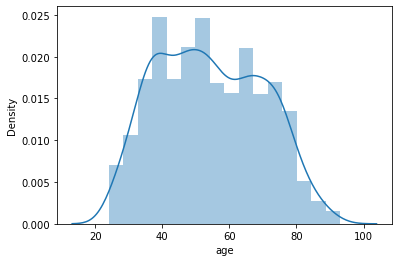

In [26]:
sns.distplot(df['age']);

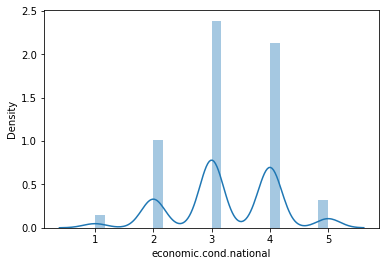

In [28]:
sns.distplot(df['economic.cond.national']);

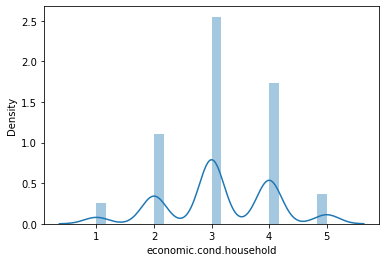

In [29]:
sns.distplot(df['economic.cond.household']);

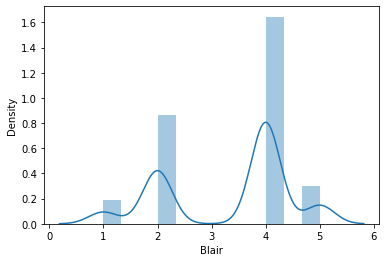

In [30]:
sns.distplot(df['Blair']);

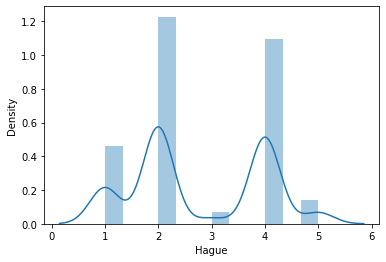

In [31]:
sns.distplot(df['Hague']);

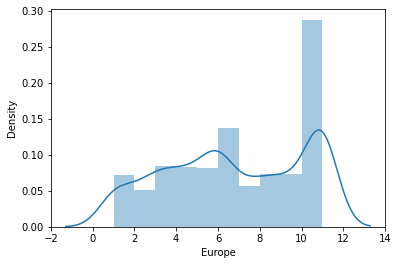

In [32]:
sns.distplot(df['Europe']);

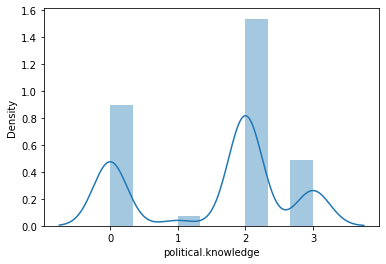

In [33]:
sns.distplot(df['political.knowledge']);

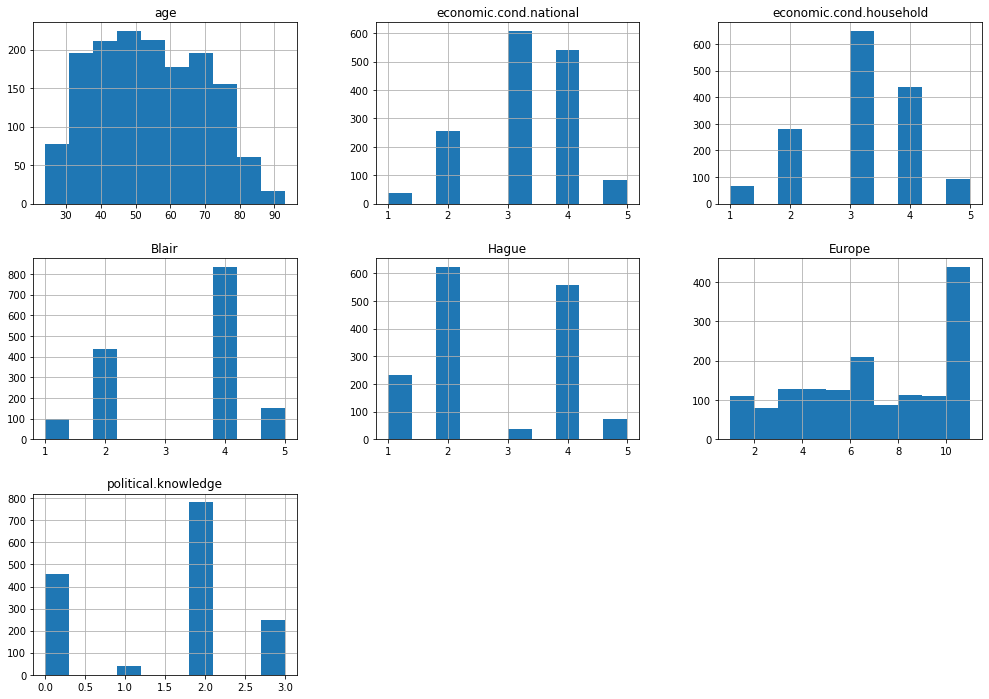

In [62]:
df.hist(figsize = (17,12));

### Bivariate Analysis

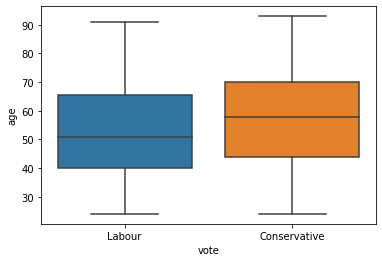

In [45]:
sns.boxplot(x="vote", y="age", data=df);

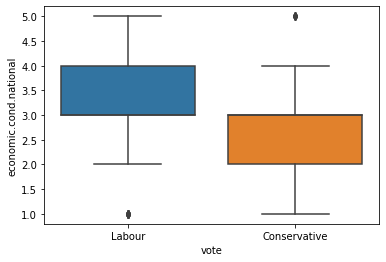

In [38]:
sns.boxplot(x="vote", y="economic.cond.national", data=df);

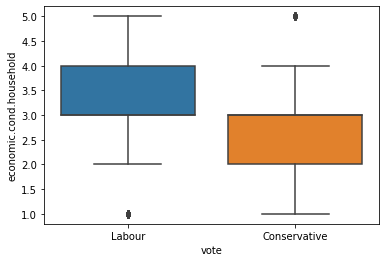

In [39]:
sns.boxplot(x="vote", y="economic.cond.household", data=df);

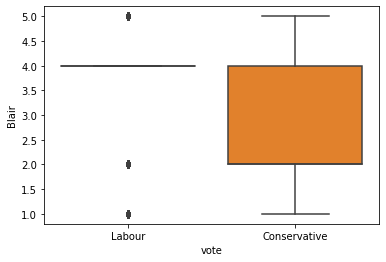

In [40]:
sns.boxplot(x="vote", y="Blair", data=df);

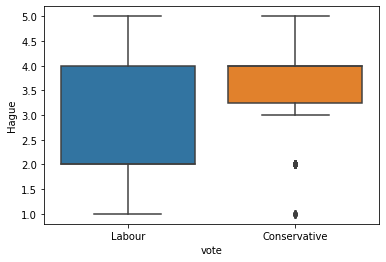

In [41]:
sns.boxplot(x="vote", y="Hague", data=df);

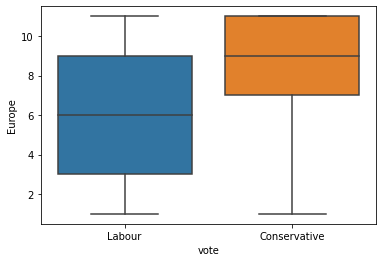

In [42]:
sns.boxplot(x="vote", y="Europe", data=df);

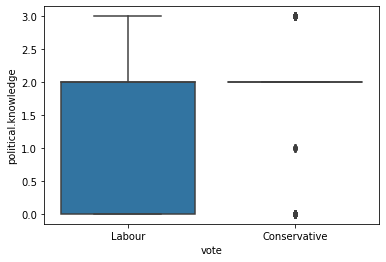

In [43]:
sns.boxplot(x="vote", y="political.knowledge", data=df);

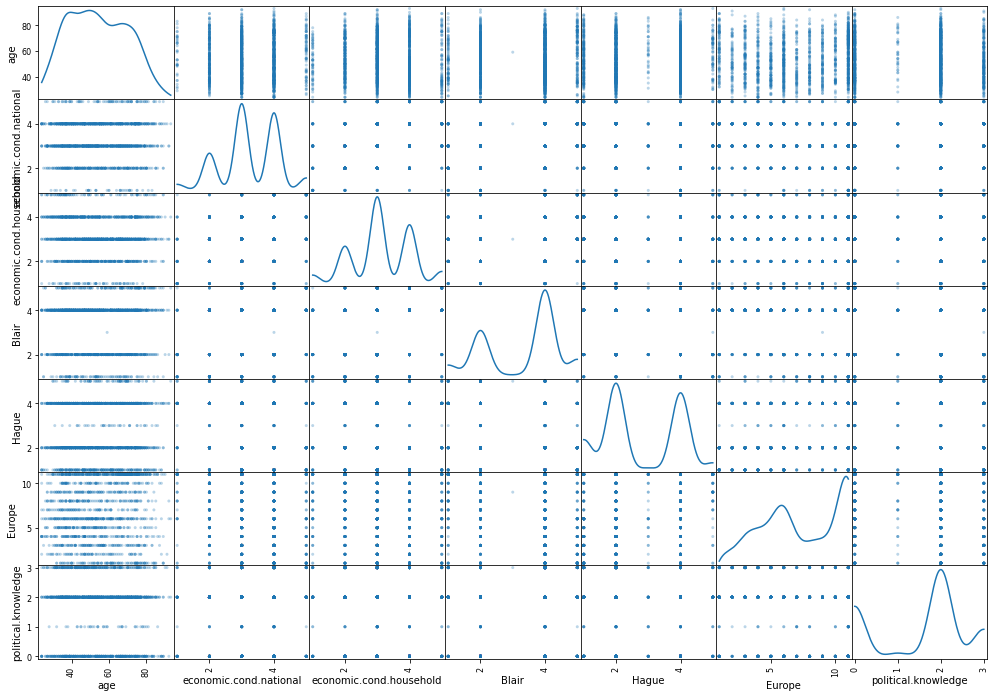

In [63]:
pd.plotting.scatter_matrix(df, alpha = 0.3, figsize = (17,12), diagonal = 'kde');

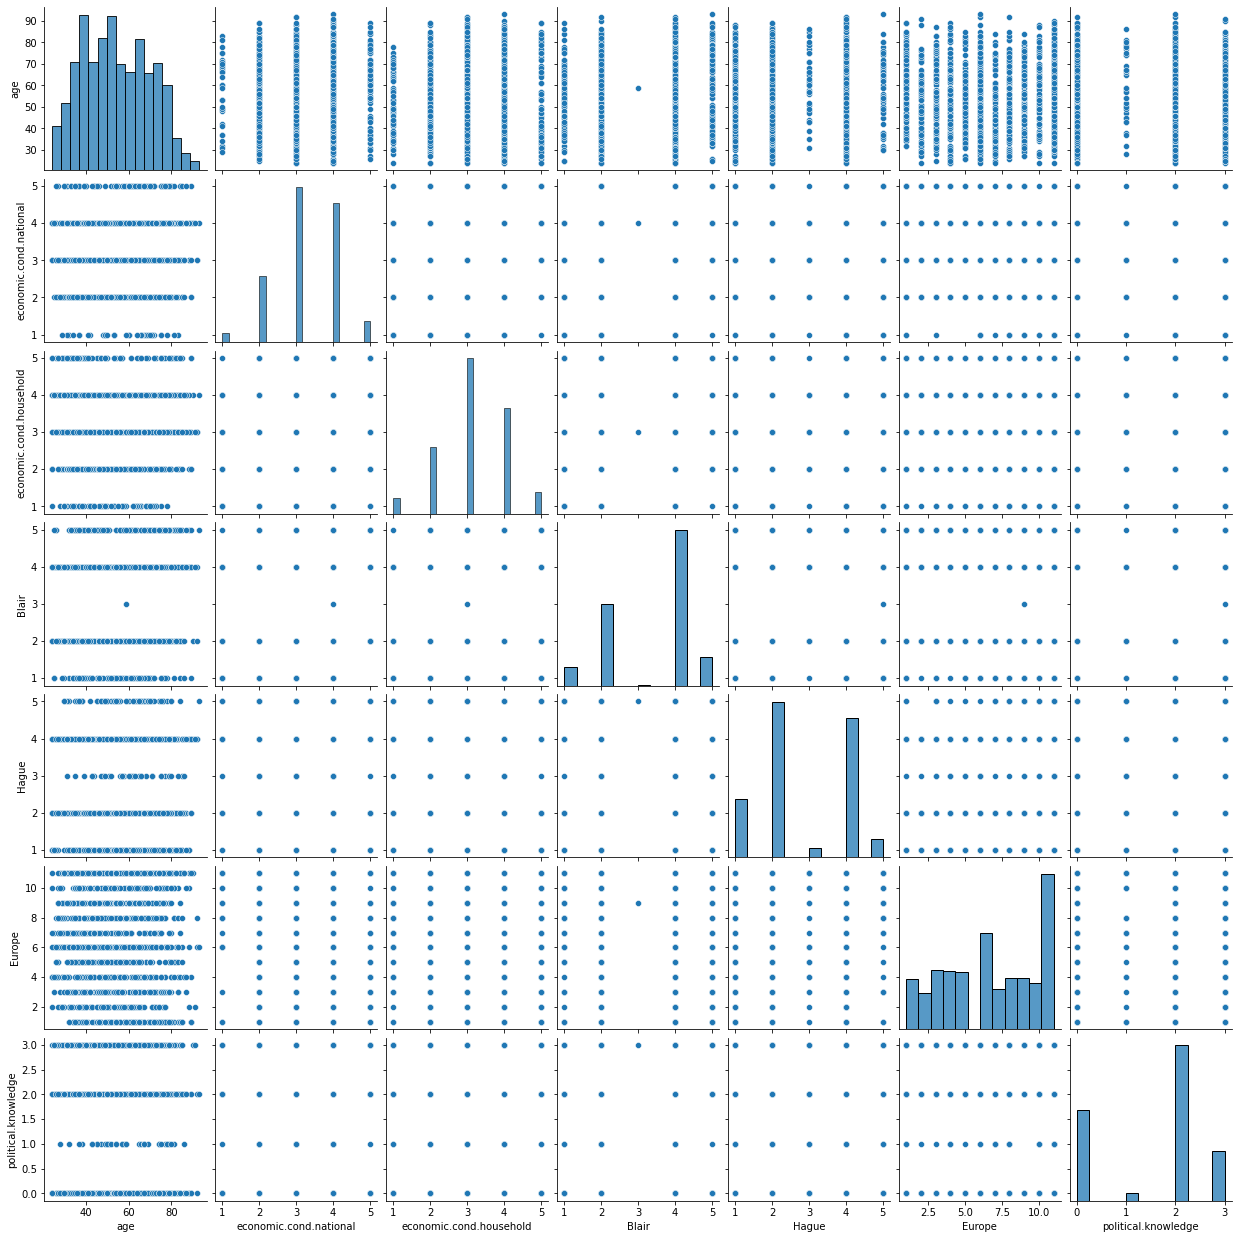

In [64]:
sns.pairplot(df)

### unique values for categorical variables

In [9]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

VOTE :  2
Conservative     462
Labour          1063
Name: vote, dtype: int64


GENDER :  2
male      713
female    812
Name: gender, dtype: int64




### Checking for duplicates

In [10]:
# Are there any duplicates ?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups]

Number of duplicate rows = 8


In [13]:
print('Before duplicate records treatment:',df.shape)
df.drop_duplicates(inplace=True) 
print('After duplicate records treatment:',df.shape)

Before duplicate records treatment: (1517, 9)
After duplicate records treatment: (1517, 9)


In [12]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


### Correlation Plot

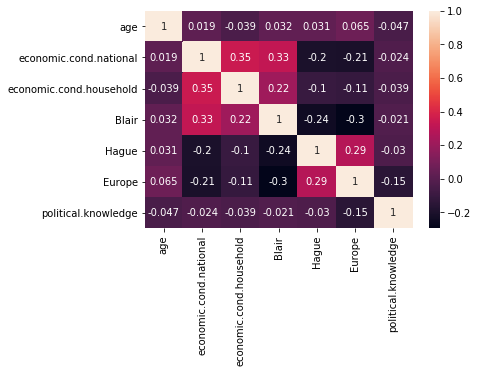

In [10]:
sns.heatmap(df.corr(),annot=True)
#plt.gcf().set_size_inches(29, 15)
plt.show()

### Covariance Plot

In [11]:
df.cov()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
age,246.544655,0.258740,-0.568222,0.591818,0.602692,3.344366,-0.793429
economic.cond.national,0.258740,0.777558,0.285454,0.337851,-0.218216,-0.608432,-0.022481
economic.cond.household,-0.568222,0.285454,0.866890,0.236065,-0.115202,-0.346780,-0.038900
Blair,0.591818,0.337851,0.236065,1.380089,-0.352571,-1.146966,-0.027134
Hague,0.602692,-0.218216,-0.115202,-0.352571,1.519005,1.161811,-0.039970
Europe,3.344366,-0.608432,-0.346780,-1.146966,1.161811,10.883687,-0.540915
political.knowledge,-0.793429,-0.022481,-0.038900,-0.027134,-0.039970,-0.540915,1.175961


### Bivariate Analysis

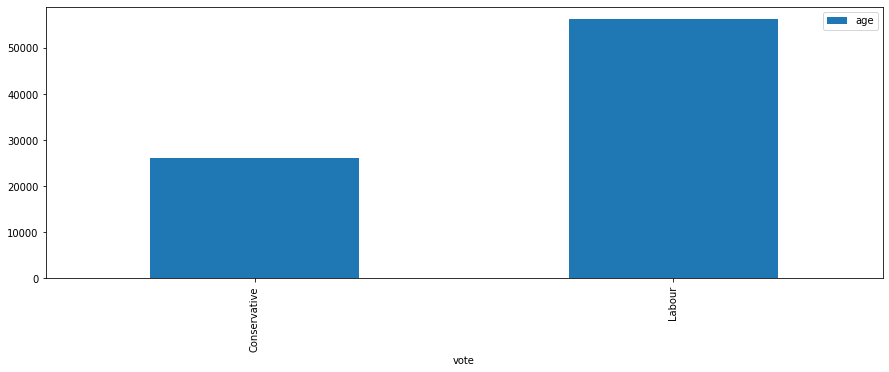

In [23]:
df.groupby(by=['vote'])['age'].sum().reset_index().sort_values(['vote']).tail(10).plot(x='vote', y='age', kind='bar',figsize=(15,5))
plt.show()

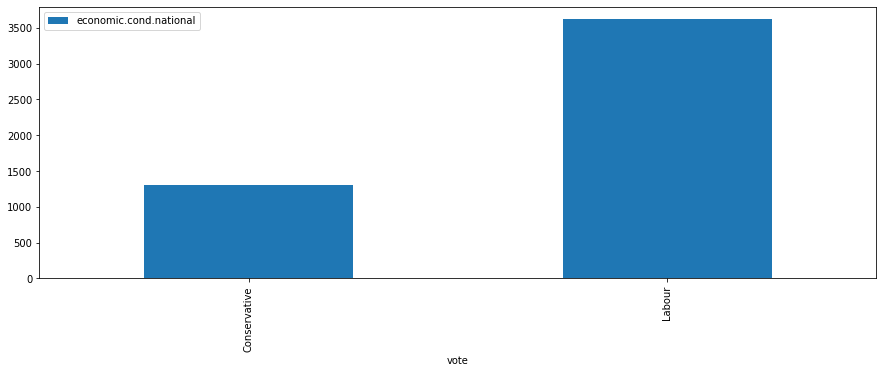

In [19]:
df.groupby(by=['vote'])['economic.cond.national'].sum().reset_index().sort_values(['vote']).tail(10).plot(x='vote', y='economic.cond.national', kind='bar',figsize=(15,5))
plt.show()

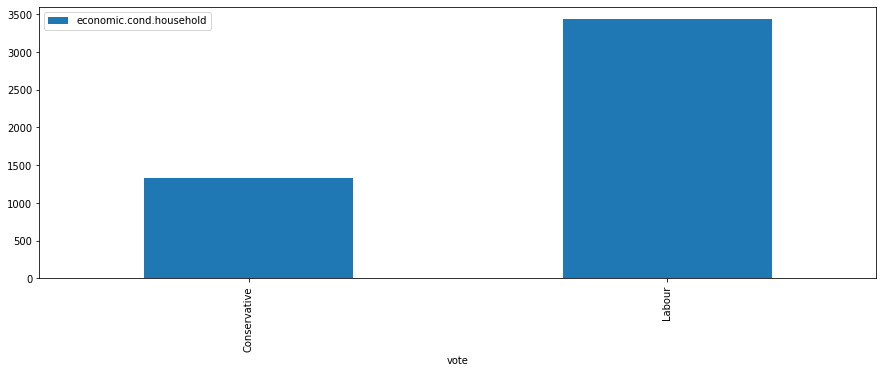

In [20]:
df.groupby(by=['vote'])['economic.cond.household'].sum().reset_index().sort_values(['vote']).tail(10).plot(x='vote', y='economic.cond.household', kind='bar',figsize=(15,5))
plt.show()

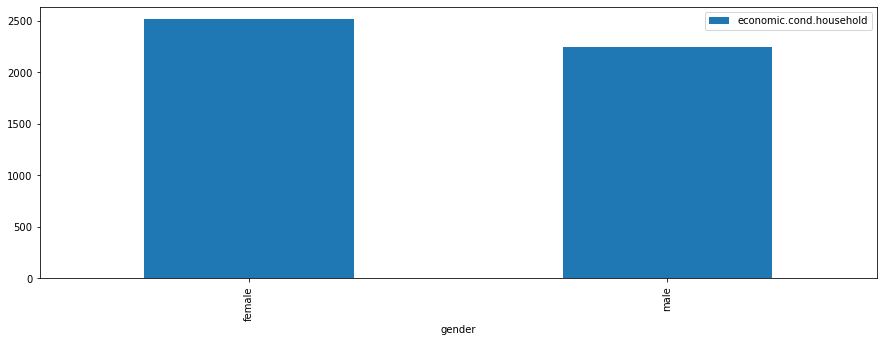

In [14]:
df.groupby(by=['gender'])['economic.cond.household'].sum().reset_index().sort_values(['gender']).tail(10).plot(x='gender', y='economic.cond.household', kind='bar',figsize=(15,5))
plt.show()

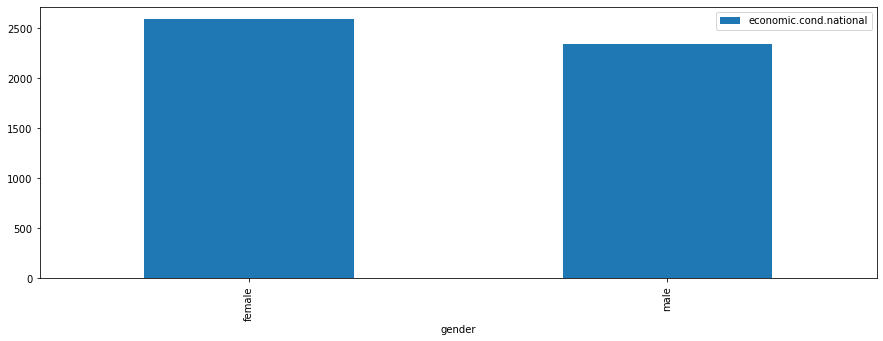

In [15]:
df.groupby(by=['gender'])['economic.cond.national'].sum().reset_index().sort_values(['gender']).tail(10).plot(x='gender', y='economic.cond.national', kind='bar',figsize=(15,5))
plt.show()

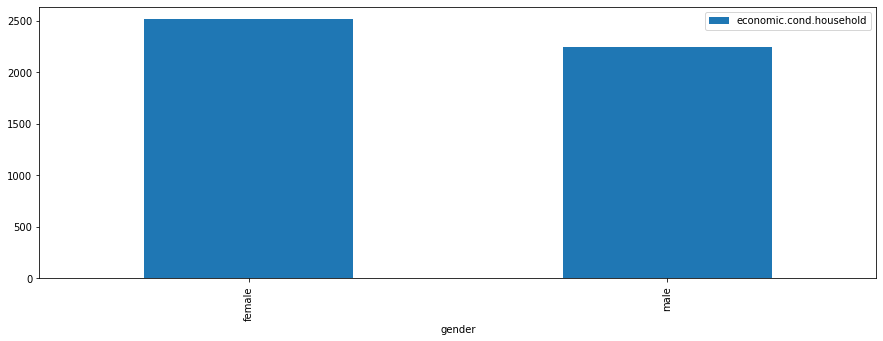

In [24]:
df.groupby(by=['gender'])['economic.cond.household'].sum().reset_index().sort_values(['gender']).tail(10).plot(x='gender', y='economic.cond.household', kind='bar',figsize=(15,5))
plt.show()

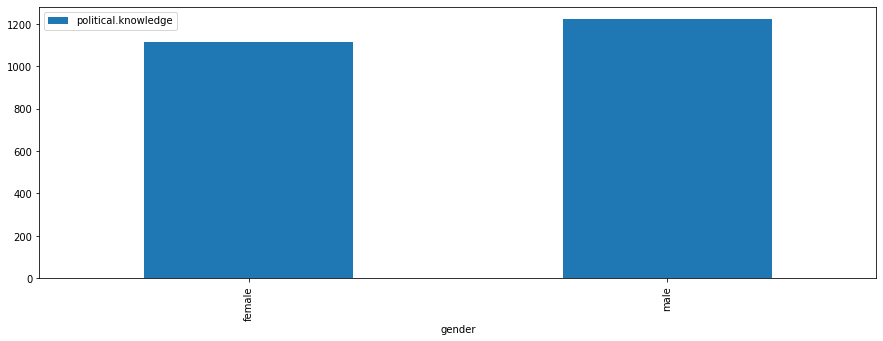

In [26]:
df.groupby(by=['gender'])['political.knowledge'].sum().reset_index().sort_values(['gender']).tail(10).plot(x='gender', y='political.knowledge', kind='bar',figsize=(15,5))
plt.show()

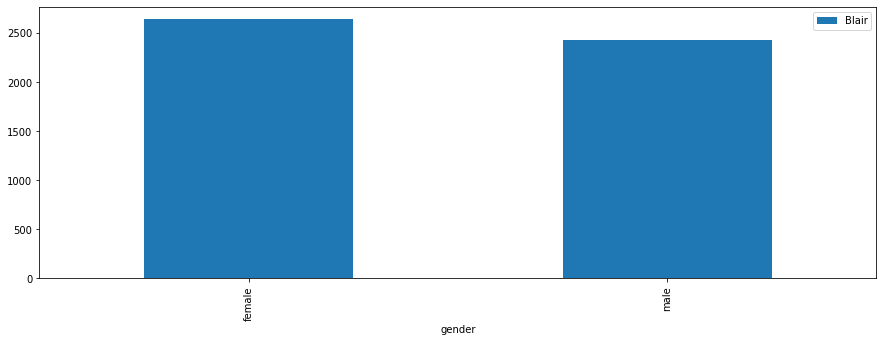

In [27]:
df.groupby(by=['gender'])['Blair'].sum().reset_index().sort_values(['gender']).tail(10).plot(x='gender', y='Blair', kind='bar',figsize=(15,5))
plt.show()

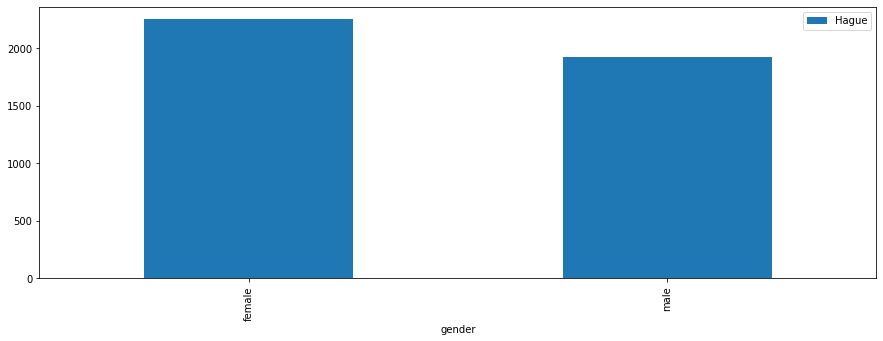

In [28]:
df.groupby(by=['gender'])['Hague'].sum().reset_index().sort_values(['gender']).tail(10).plot(x='gender', y='Hague', kind='bar',figsize=(15,5))
plt.show()

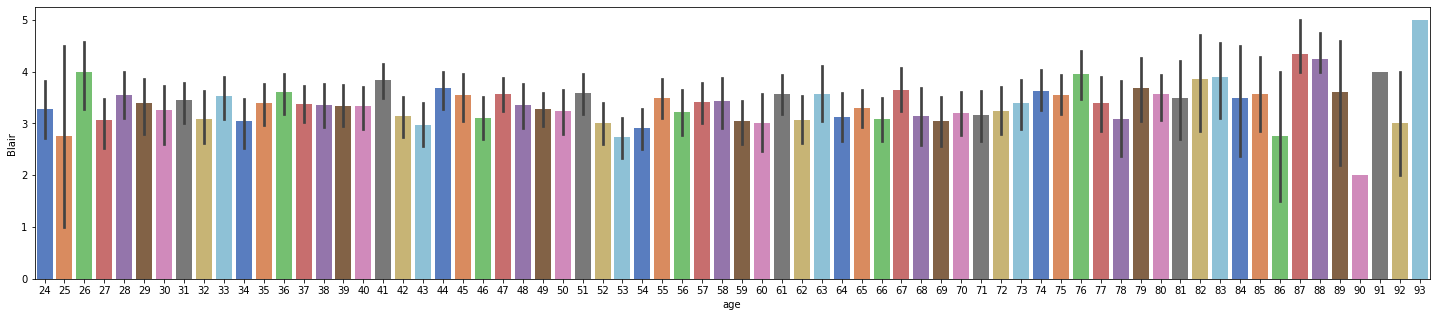

In [30]:
plt.figure(figsize=(25,5))  # setting the figure size
ax = sns.barplot(x='age', y='Blair', data=df, palette='muted')  # barplot

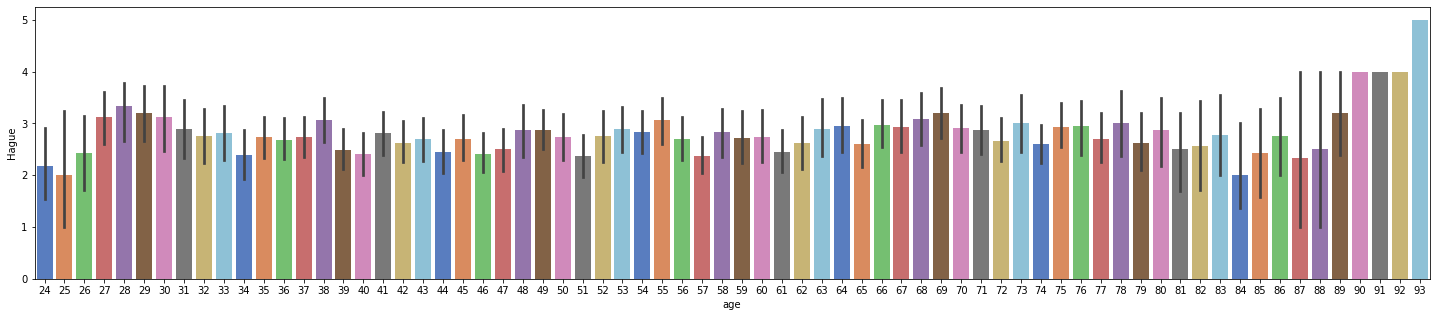

In [31]:
plt.figure(figsize=(25,5))  # setting the figure size
ax = sns.barplot(x='age', y='Hague', data=df, palette='muted')  # barplot

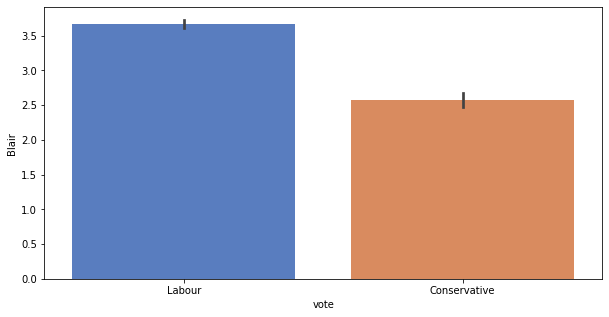

In [32]:
plt.figure(figsize=(10,5))  # setting the figure size
ax = sns.barplot(x='vote', y='Blair', data=df, palette='muted')  # barplot

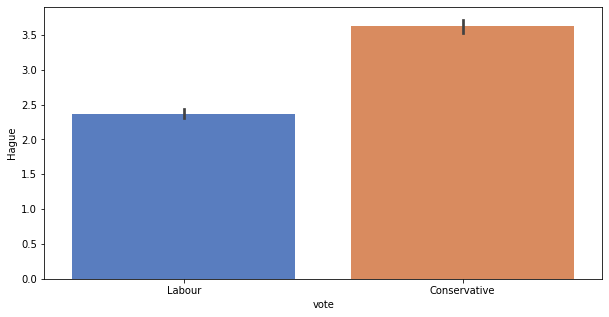

In [33]:
plt.figure(figsize=(10,5))  # setting the figure size
ax = sns.barplot(x='vote', y='Hague', data=df, palette='muted')  # barplot

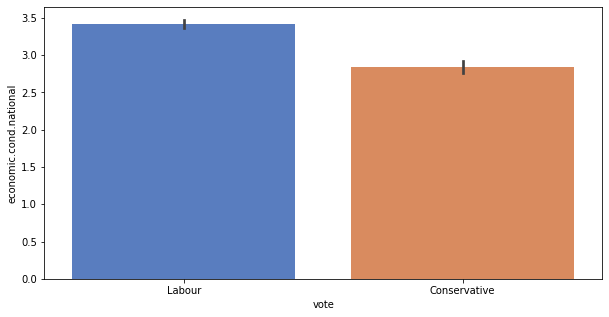

In [34]:
plt.figure(figsize=(10,5))  # setting the figure size
ax = sns.barplot(x='vote', y='economic.cond.national', data=df, palette='muted')  # barplot

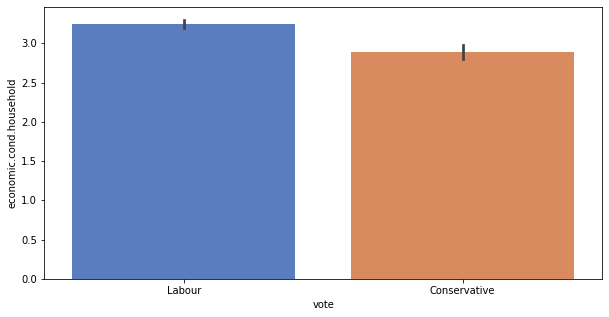

In [35]:
plt.figure(figsize=(10,5))  # setting the figure size
ax = sns.barplot(x='vote', y='economic.cond.household', data=df, palette='muted')  # barplot

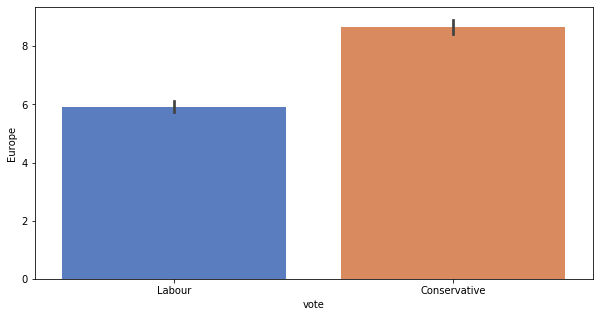

In [36]:
plt.figure(figsize=(10,5))  # setting the figure size
ax = sns.barplot(x='vote', y='Europe', data=df, palette='muted')  # barplot

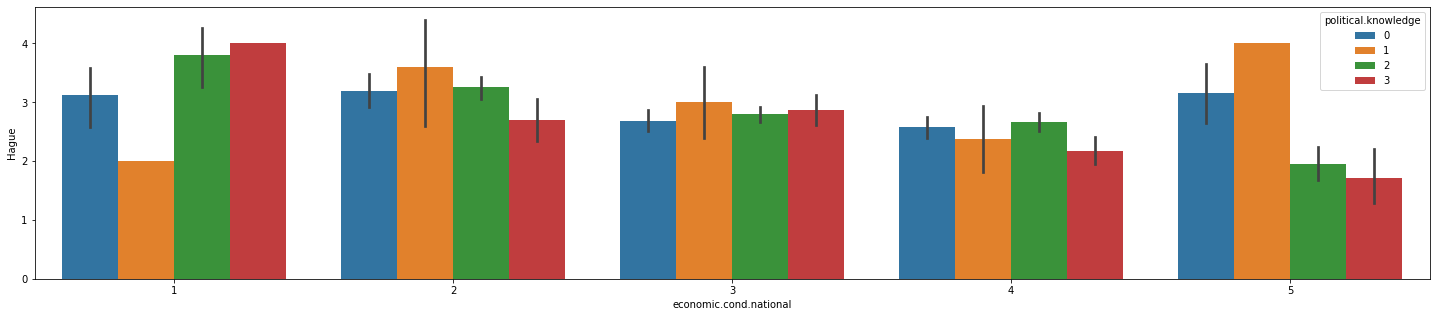

In [48]:
plt.figure(figsize=(25,5))
sns.barplot(data=df,x='economic.cond.national',y='Hague',hue='political.knowledge')
plt.show()

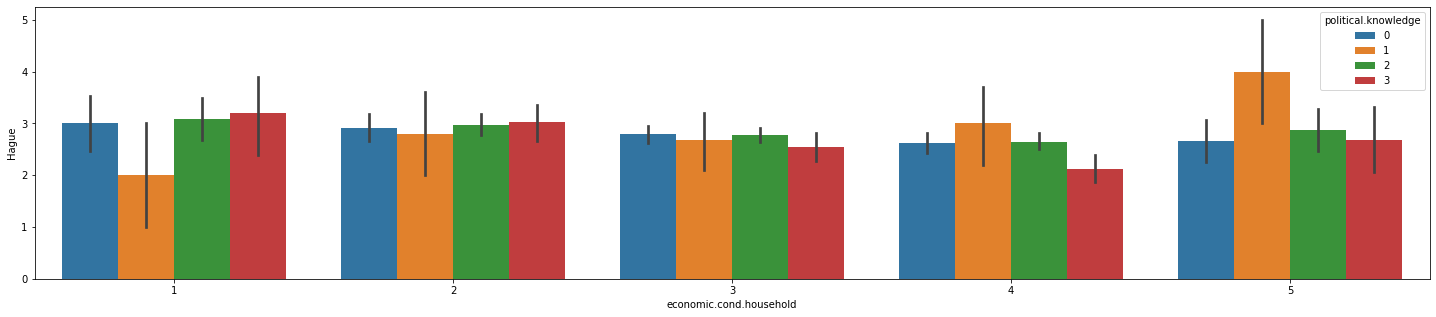

In [49]:
plt.figure(figsize=(25,5))
sns.barplot(data=df,x='economic.cond.household',y='Hague',hue='political.knowledge')
plt.show()

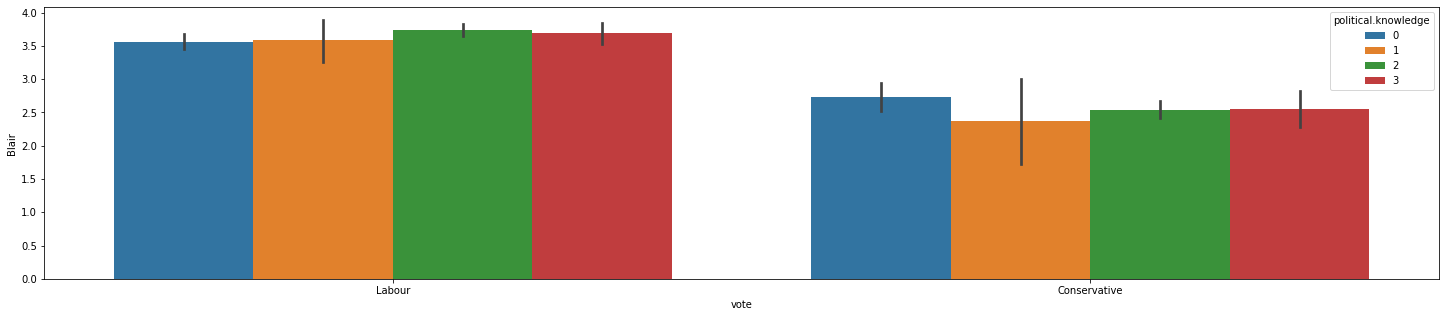

In [61]:
plt.figure(figsize=(25,5))
sns.barplot(data=df,x='vote',y='Blair',hue='political.knowledge')
plt.show()

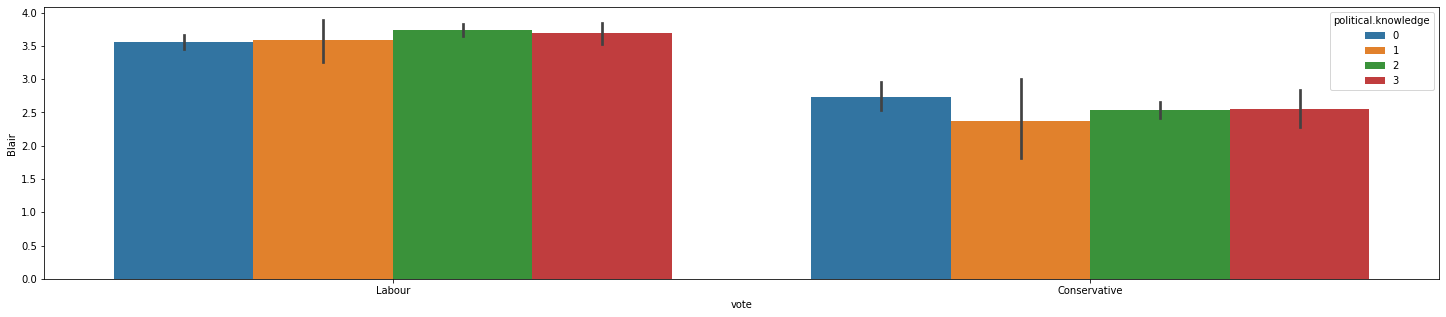

In [60]:
plt.figure(figsize=(25,5))
sns.barplot(data=df,x='vote',y='Blair',hue='political.knowledge')
plt.show()

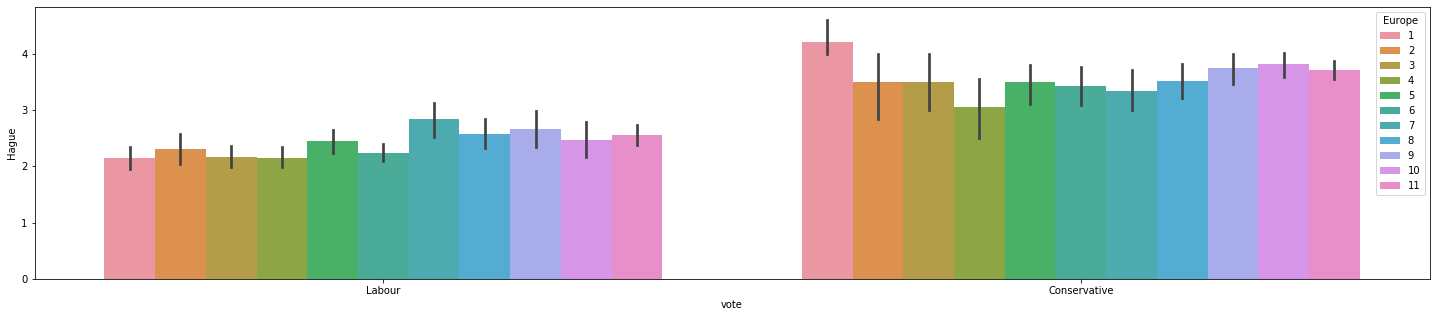

In [58]:
plt.figure(figsize=(25,5))
sns.barplot(data=df,x='vote',y='Hague',hue='Europe')
plt.show()

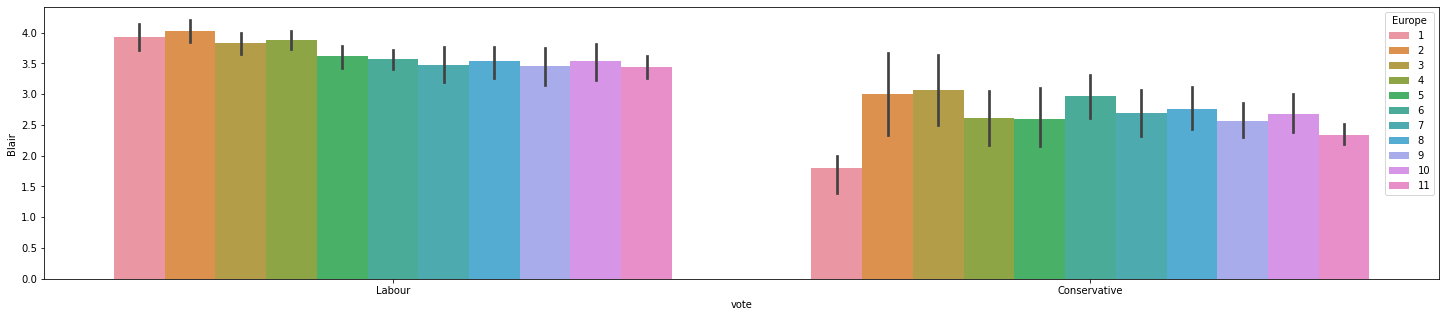

In [6]:
plt.figure(figsize=(25,5))
sns.barplot(data=df,x='vote',y='Blair',hue='Europe')
plt.show()

### Outlier Checks

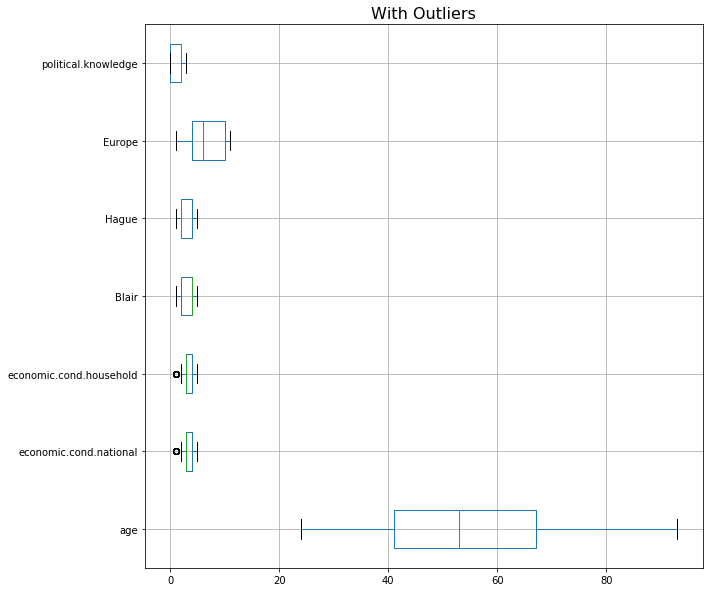

In [62]:
# construct box plot for continuous variables
cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [66]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [69]:
df.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

In [70]:
columns = ['economic.cond.national', 'economic.cond.household']
for column in columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

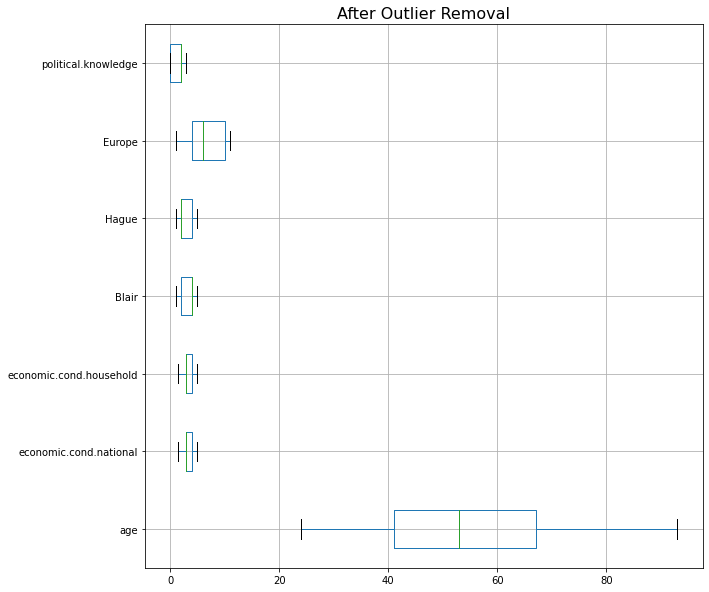

In [72]:
plt.figure(figsize=(10,10))
df.boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

## 1.3) Encode the data (having string values) for Modelling. Is Scaling necessary here or not?( 3 pts), Data Split: Split the data into train and test (70:30) (2 pts).

In [16]:
df

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male
...,...,...,...,...,...,...,...,...,...
1520,Conservative,67,5,3,2,4,11,3,male
1521,Conservative,73,2,2,4,4,8,2,male
1522,Labour,37,3,3,5,4,2,2,male
1523,Conservative,61,3,3,1,4,11,2,male


In [17]:
df["vote"] = np.where(df["vote"] == "Conservative",0,1)

In [18]:
df["gender"] = np.where(df["gender"] == "male",0,1)

In [19]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()

In [23]:
df['age'] = std_scale.fit_transform(df[['age']])
df['economic.cond.national'] = std_scale.fit_transform(df[['economic.cond.national']])
df['economic.cond.household'] = std_scale.fit_transform(df[['economic.cond.household']])
df['Blair'] = std_scale.fit_transform(df[['Blair']])
df['Hague'] = std_scale.fit_transform(df[['Hague']])
df['Europe'] = std_scale.fit_transform(df[['Europe']])
df['political.knowledge'] = std_scale.fit_transform(df[['political.knowledge']])
df['vote'] = std_scale.fit_transform(df[['vote']])
df['gender'] = std_scale.fit_transform(df[['gender']])
df

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,0.659692,-0.716161,-0.278185,-0.148020,0.565802,-1.419969,-1.437338,0.423832,0.936736
1,0.659692,-1.162118,0.856242,0.926367,0.565802,1.014951,-0.527684,0.423832,-1.067536
2,0.659692,-1.225827,0.856242,0.926367,1.417312,-0.608329,-1.134120,0.423832,-1.067536
3,0.659692,-1.926617,0.856242,-1.222408,-1.137217,-1.419969,-0.830902,-1.421084,0.936736
4,0.659692,-0.843577,-1.412613,-1.222408,-1.988727,-1.419969,-0.224465,0.423832,-1.067536
...,...,...,...,...,...,...,...,...,...
1520,-1.515858,0.812836,1.990670,-0.148020,-1.137217,1.014951,1.291625,1.346290,-1.067536
1521,-1.515858,1.195085,-1.412613,-1.222408,0.565802,1.014951,0.381971,0.423832,-1.067536
1522,0.659692,-1.098410,-0.278185,-0.148020,1.417312,1.014951,-1.437338,0.423832,-1.067536
1523,-1.515858,0.430587,-0.278185,-0.148020,-1.988727,1.014951,1.291625,0.423832,-1.067536


### Train-Test Split

In [21]:
# Copy all the predictor variables into X dataframe
X = df.drop('vote', axis=1)

# Copy target into the y dataframe. 
y = df[['vote']]

In [22]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=y)

### 1.4) Apply Logistic Regression and LDA (Linear Discriminant Analysis) (3 pts). Interpret the inferences of both model s (2 pts)

### Logistic Regression Model

In [24]:
from sklearn.linear_model import LogisticRegression
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.8s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

### Predicting on Training and Test dataset

In [25]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

### Getting the Predicted Classes and Probs

In [26]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.199510,0.800490
1,0.610744,0.389256
2,0.083468,0.916532
3,0.030816,0.969184
4,0.135993,0.864007


In [110]:
## Model Evaluation
# Accuracy - Training Data
model.score(X_train, y_train)

0.8406747891283973

### AUC and ROC for the training data

AUC: 0.889


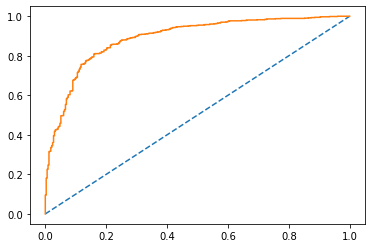

In [113]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [114]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.8231441048034934

### AUC and ROC for the test data

AUC: 0.889


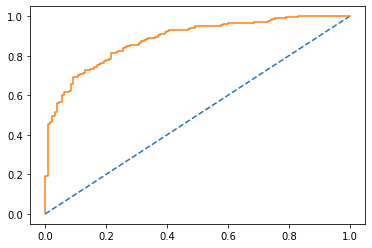

In [116]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [117]:
### Confusion Matrix for the training data

In [118]:
confusion_matrix(y_train, ytrain_predict)

array([[230, 102],
       [ 68, 667]], dtype=int64)

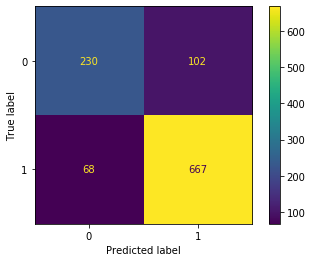

In [119]:
plot_confusion_matrix(model,X_train,y_train);

In [120]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.77      0.69      0.73       332
           1       0.87      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



### Confusion Matrix for test data

In [122]:
confusion_matrix(y_test, ytest_predict)

array([[ 85,  45],
       [ 36, 292]], dtype=int64)

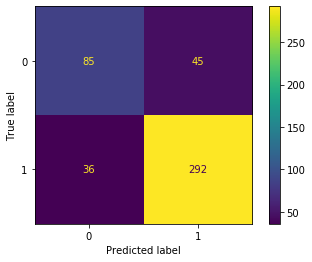

In [123]:
plot_confusion_matrix(model,X_test,y_test);

In [124]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.70      0.65      0.68       130
           1       0.87      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



## Applying GridSearchCV for Logistic Regression

In [125]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}

In [126]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [128]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [129]:
grid_search.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [130]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'sag', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2, solver='sag')


In [132]:
best_model = grid_search.best_estimator_

In [133]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [134]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.931693,0.068307
1,0.687462,0.312538
2,0.335194,0.664806
3,0.477060,0.522940
4,0.160136,0.839864


              precision    recall  f1-score   support

           0       0.77      0.69      0.73       332
           1       0.87      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067
 



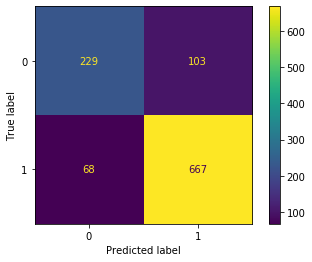

In [135]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.70      0.65      0.68       130
           1       0.87      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458
 



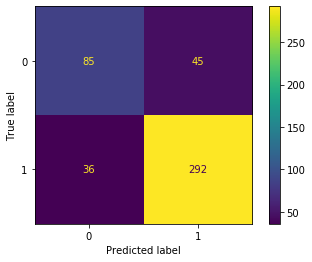

In [136]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

### Linear Discriminant Analysis

In [27]:
Y_train = y_train
Y_test = y_test

In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,Y_train)

### Prediction

In [29]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

### Training Data and Test Data Confusion Matrix Comparison

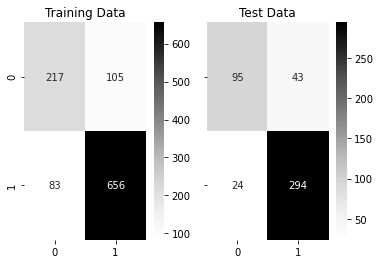

In [30]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(Y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');


### Training Data and Test Data Classification Report Comparison

In [31]:
print('Classification Report of the training data:\n\n',metrics.classification_report(Y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.72      0.67      0.70       322
           1       0.86      0.89      0.87       739

    accuracy                           0.82      1061
   macro avg       0.79      0.78      0.79      1061
weighted avg       0.82      0.82      0.82      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.80      0.69      0.74       138
           1       0.87      0.92      0.90       318

    accuracy                           0.85       456
   macro avg       0.84      0.81      0.82       456
weighted avg       0.85      0.85      0.85       456
 



### Probability prediction for the training and test data

In [40]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [41]:
pred_prob_train[:,1]

array([0.8790251 , 0.98828469, 0.38359105, ..., 0.98920521, 0.22969123,
       0.22989442])

AUC for the Training Data: 0.877
AUC for the Test Data: 0.914


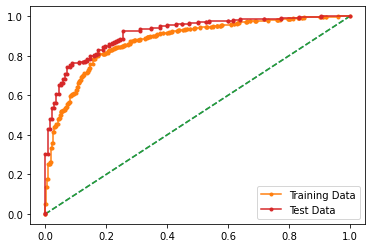

In [42]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(Y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### 1.5) Apply KNN Model and Naïve Bayes Model(5 pts). Interpret the inferences of each model (2 pts)

In [43]:
# loading library
from sklearn.neighbors import KNeighborsClassifier

# initiantiate learning model (k = 3)
KNN_model=KNeighborsClassifier(n_neighbors = 3,metric='euclidean')

# fitting the model
KNN_model.fit(X_train,y_train)

# predict the response
y_test_predict = KNN_model.predict(X_test)

# evaluate accuracy
print("Accuracy Score for K=3 is ", KNN_model.score(X_test, y_test))

# initiantiate learning model (k = 5)
KNN_model=KNeighborsClassifier(n_neighbors = 5,metric='euclidean')

# fitting the model
KNN_model.fit(X_train,y_train)

# predict the response
y_test_predict = KNN_model.predict(X_test)

# evaluate accuracy
print("Accuracy Score for K=5 is ", KNN_model.score(X_test, y_test))

# initiantiate learning model (k = 9)
from sklearn.neighbors import KNeighborsClassifier
KNN_model=KNeighborsClassifier(n_neighbors = 9,metric='euclidean')

# fitting the model
KNN_model.fit(X_train,y_train)

# predict the response
y_test_predict = KNN_model.predict(X_test)

# evaluate accuracy
print("Accuracy Score for K=9 is ", KNN_model.score(X_test, y_test))

Accuracy Score for K=3 is  0.8399122807017544
Accuracy Score for K=5 is  0.8530701754385965
Accuracy Score for K=9 is  0.8552631578947368


In [44]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8520263901979265
[[233  89]
 [ 68 671]]
              precision    recall  f1-score   support

           0       0.77      0.72      0.75       322
           1       0.88      0.91      0.90       739

    accuracy                           0.85      1061
   macro avg       0.83      0.82      0.82      1061
weighted avg       0.85      0.85      0.85      1061



In [45]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8552631578947368
[[103  35]
 [ 31 287]]
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       138
           1       0.89      0.90      0.90       318

    accuracy                           0.86       456
   macro avg       0.83      0.82      0.83       456
weighted avg       0.85      0.86      0.85       456



**Default value n_neighbors=5, lets check the performance for K=7**

In [46]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=7)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [47]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8529688972667295
[[232  90]
 [ 66 673]]
              precision    recall  f1-score   support

           0       0.78      0.72      0.75       322
           1       0.88      0.91      0.90       739

    accuracy                           0.85      1061
   macro avg       0.83      0.82      0.82      1061
weighted avg       0.85      0.85      0.85      1061



In [48]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8464912280701754
[[102  36]
 [ 34 284]]
              precision    recall  f1-score   support

           0       0.75      0.74      0.74       138
           1       0.89      0.89      0.89       318

    accuracy                           0.85       456
   macro avg       0.82      0.82      0.82       456
weighted avg       0.85      0.85      0.85       456



In [49]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE


[0.1864035087719298,
 0.1600877192982456,
 0.14692982456140347,
 0.1535087719298246,
 0.14473684210526316,
 0.13815789473684215,
 0.14035087719298245,
 0.14035087719298245,
 0.14035087719298245,
 0.13815789473684215]

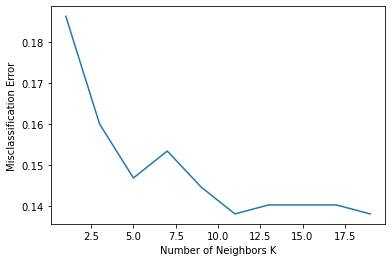

In [50]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

## Gaussian Naive Bayes 

In [51]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [52]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

**Performance Matrix on train data set**

In [53]:
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)                      ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))          ## confusion_matrix
print(metrics.classification_report(y_train, y_train_predict))     ## classification_report

0.8199811498586239
[[226  96]
 [ 95 644]]
              precision    recall  f1-score   support

           0       0.70      0.70      0.70       322
           1       0.87      0.87      0.87       739

    accuracy                           0.82      1061
   macro avg       0.79      0.79      0.79      1061
weighted avg       0.82      0.82      0.82      1061



In [54]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)                    ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))         ## confusion_matrix
print(metrics.classification_report(y_test, y_test_predict))    ## classification_report

0.8574561403508771
[[100  38]
 [ 27 291]]
              precision    recall  f1-score   support

           0       0.79      0.72      0.75       138
           1       0.88      0.92      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.82      0.83       456
weighted avg       0.86      0.86      0.86       456



**Accuracy of our Gaussian Naive Bayes model**

In [55]:
NB_model.score(X_train, y_train)

0.8199811498586239

In [56]:
NB_model.score(X_test, y_test)

0.8574561403508771

### 1.6) Model Tuning (2 pts) , Bagging ( 2.5 pts) and Boosting (2.5 pts).

## Ada Boost

In [171]:
from sklearn.ensemble import AdaBoostClassifier


ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [172]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8472352389878163
[[238  94]
 [ 69 666]]
              precision    recall  f1-score   support

           0       0.78      0.72      0.74       332
           1       0.88      0.91      0.89       735

    accuracy                           0.85      1067
   macro avg       0.83      0.81      0.82      1067
weighted avg       0.84      0.85      0.85      1067



In [173]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8187772925764192
[[ 90  40]
 [ 43 285]]
              precision    recall  f1-score   support

           0       0.68      0.69      0.68       130
           1       0.88      0.87      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



## Gradient Boosting

In [174]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [175]:
## Performance Matrix on train data set
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8865979381443299
[[262  70]
 [ 51 684]]
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       332
           1       0.91      0.93      0.92       735

    accuracy                           0.89      1067
   macro avg       0.87      0.86      0.87      1067
weighted avg       0.89      0.89      0.89      1067



In [176]:
## Performance Matrix on test data set
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8318777292576419
[[ 96  34]
 [ 43 285]]
              precision    recall  f1-score   support

           0       0.69      0.74      0.71       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.80      0.80       458
weighted avg       0.84      0.83      0.83       458



## Bagging

In [177]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

In [178]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9990627928772259
[[331   1]
 [  0 735]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       1.00      1.00      1.00       735

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



In [179]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8013100436681223
[[ 85  45]
 [ 46 282]]
              precision    recall  f1-score   support

           0       0.65      0.65      0.65       130
           1       0.86      0.86      0.86       328

    accuracy                           0.80       458
   macro avg       0.76      0.76      0.76       458
weighted avg       0.80      0.80      0.80       458



### 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model (4 pts) Final Model - Compare all models on the basis of the performance metrics in a structured tabular manner. Describe on which model is best/optimized (3 pts)

## 1.8) Based on your analysis and working on the business problem, detail out appropriate insights and recommendations to help the management solve the business objective.